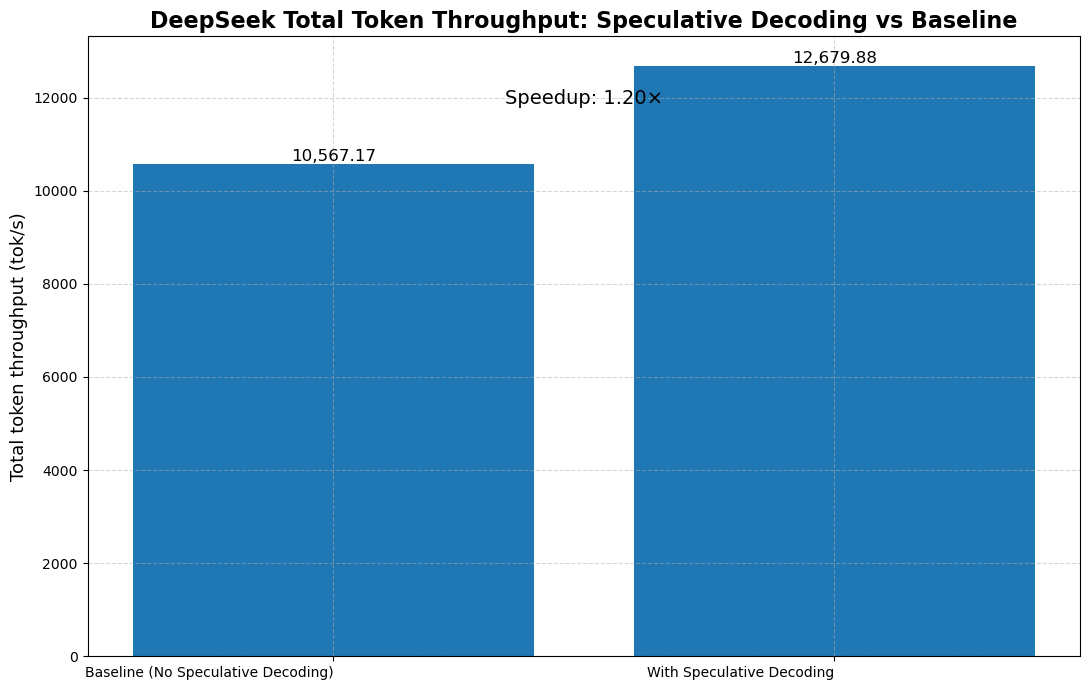

In [3]:
# Create a simple comparison plot for Total token throughput (tok/s)
import matplotlib.pyplot as plt
import pandas as pd
# from caas_jupyter_tools import display_dataframe_to_user

# Data parsed from the user's message
data = [
    {"Label": "Baseline (No Speculative Decoding)", "Speculative Decoding": "No", "Total token throughput (tok/s)": 10567.17, "Request throughput (req/s)": 20.81, "Benchmark duration (s)": 96.09},
    {"Label": "With Speculative Decoding", "Speculative Decoding": "Yes", "Total token throughput (tok/s)": 12679.88, "Request throughput (req/s)": 24.97, "Benchmark duration (s)": 80.08},
]

df = pd.DataFrame(data)

# Compute speedup
baseline = df.loc[df["Speculative Decoding"] == "No", "Total token throughput (tok/s)"].iloc[0]
spec = df.loc[df["Speculative Decoding"] == "Yes", "Total token throughput (tok/s)"].iloc[0]
speedup = spec / baseline

# Show the data in a small table for reference
# display_dataframe_to_user("DeepSeek throughput comparison", df)

# Plot
plt.figure(figsize=(11, 7))
plt.title("DeepSeek Total Token Throughput: Speculative Decoding vs Baseline", fontsize=16, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)

labels = df["Label"].tolist()
values = df["Total token throughput (tok/s)"].tolist()

bars = plt.bar(labels, values)
plt.ylabel("Total token throughput (tok/s)", fontsize=13)
plt.xticks(rotation=0, ha="right")

# Annotate exact values on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{val:,.2f}", ha='center', va='bottom', fontsize=12)

# Add a text box with speedup
plt.text(0.5, 0.9, f"Speedup: {speedup:.2f}×", transform=plt.gca().transAxes, ha="center", va="center", fontsize=14)

# Save outputs
# png_path = "/mnt/data/deepseek_speculative_vs_baseline_throughput.png"
# pdf_path = "/mnt/data/deepseek_speculative_vs_baseline_throughput.pdf"
plt.tight_layout()
# plt.savefig(png_path, dpi=220, bbox_inches="tight")
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

# png_path, pdf_path, speedup
# 

                               Config  Total token throughput (tok/s)
0  Baseline (No Speculative Decoding)                        10567.17
1           With Speculative Decoding                        12679.88


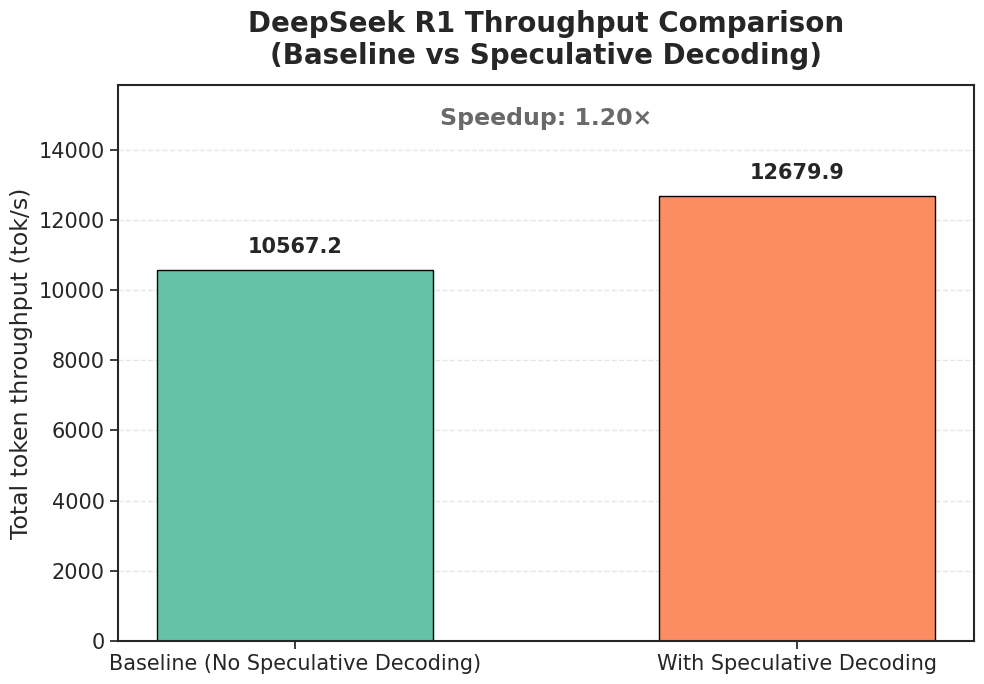

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# -----------------------------
# Seaborn style and palette
# -----------------------------
palette = sns.color_palette('Set2')
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

colors = sns.color_palette()

# -----------------------------
# Data
# -----------------------------
labels = ["Baseline (No Speculative Decoding)", "With Speculative Decoding"]
x = np.arange(len(labels))
throughput = np.array([10567.17, 12679.88])

# Compute speedup
speedup = throughput[1] / throughput[0]

df = pd.DataFrame({
    "Config": labels,
    "Total token throughput (tok/s)": throughput,
})
print(df)

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 7))

bars = ax.bar(x, throughput, color=[colors[0], colors[1]], edgecolor='black', width=0.55)

# -----------------------------
# Axis and title styling
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha="center", fontsize=16)
ax.set_ylabel("Total token throughput (tok/s)", fontsize=17)
ax.set_title("DeepSeek R1 Throughput Comparison\n(Baseline vs Speculative Decoding)",
             fontsize=20, fontweight="bold", pad=15)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.set_ylim(0, max(throughput) * 1.25)

# -----------------------------
# Annotate bars
# -----------------------------
for i, val in enumerate(throughput):
    ax.text(i, val + max(throughput) * 0.03, f"{val:.1f}", ha="center", va="bottom", fontsize=15, fontweight="bold")

# Show speedup annotation
ax.text(0.5, max(throughput) * 1.15, f"Speedup: {speedup:.2f}×",
        ha="center", va="bottom", fontsize=17, color="dimgray", fontweight="bold")

# -----------------------------
# Spine and ticks
# -----------------------------
ax.tick_params(axis='both', which='major', labelsize=15)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# -----------------------------
# Layout and export
# -----------------------------
fig.tight_layout()
plt.savefig("deepseek_specdec_set2_largefont.png", dpi=220, bbox_inches="tight")
plt.savefig("deepseek_specdec_set2_largefont.pdf", bbox_inches="tight")
plt.show()


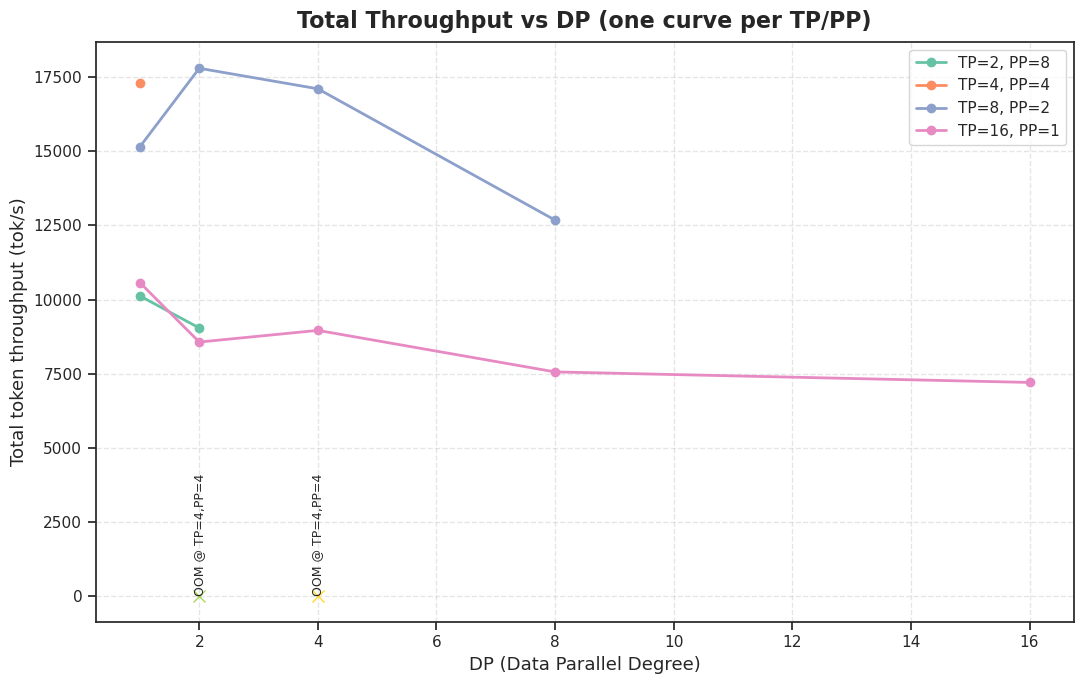

/tmp/ipykernel_4124628/457997759.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(best_sorted["Label"], rotation=20, ha="right")


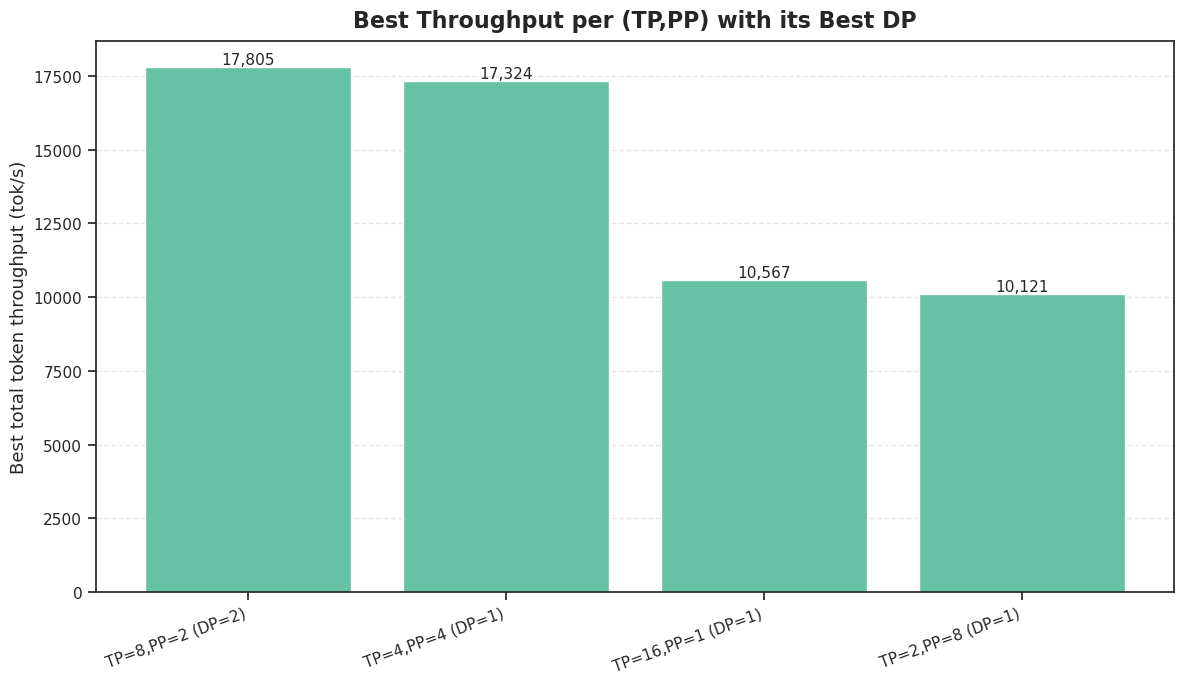

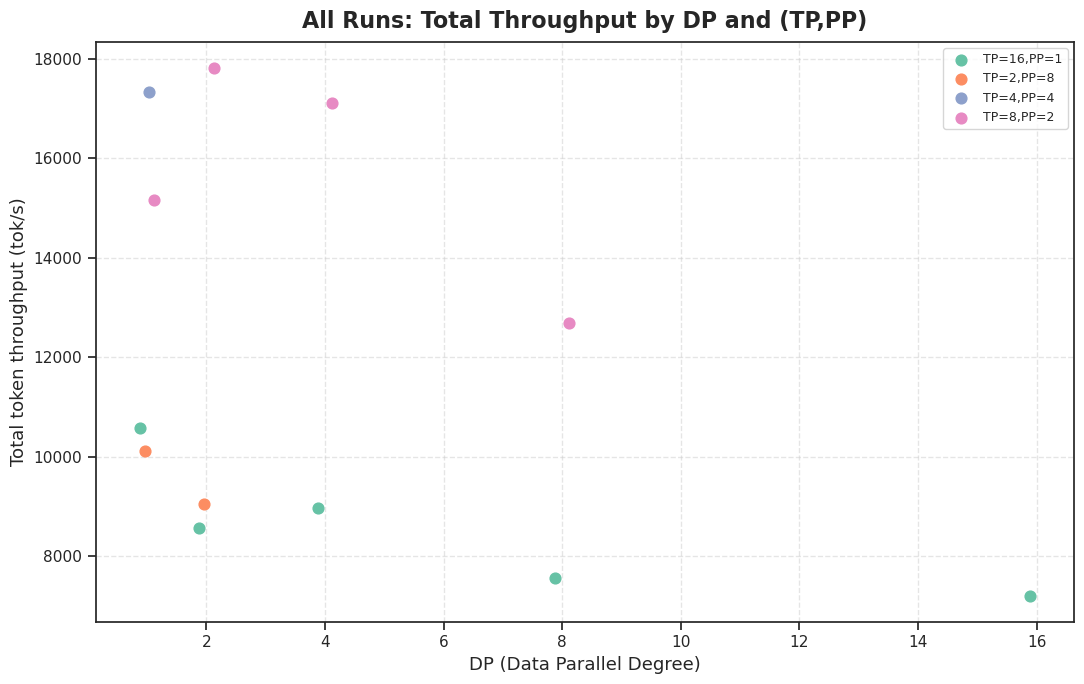

In [11]:
# Parse the user's benchmark results and plot Total token throughput (tok/s)
# NOTE: Using matplotlib only (no seaborn), one chart per figure, and no explicit colors.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

# -----------------------------
# Raw data entered from user
# -----------------------------
rows = [
    # (TP, PP, DP, total_throughput, note)
    (2, 8, 1, 10121.05, ""),
    (16, 1, 1, 10567.17, ""),
    (2, 8, 2, 9039.90, ""),
    (16, 1, 2, 8566.00, ""),
    (4, 4, 1, 17324.45, ""),
    (16, 1, 4, 8959.44, ""),
    (4, 4, 2, None, "CUDA OOM"),
    (16, 1, 8, 7557.84, ""),
    (4, 4, 4, None, "CUDA OOM"),
    (16, 1, 16, 7202.73, ""),
    (8, 2, 1, 15159.387655088216, ""),
    (8, 2, 2, 17805.00, ""),
    (8, 2, 4, 17111.97, ""),
    (8, 2, 8, 12679.88, ""),
]

df = pd.DataFrame(rows, columns=["TP", "PP", "DP", "Total tok/s", "Note"])

# Aggregate repeated runs by taking mean and also keeping best
agg_df_mean = (
    df.dropna(subset=["Total tok/s"])
      .groupby(["TP", "PP", "DP"], as_index=False)
      .agg(**{
          "Mean tok/s": ("Total tok/s", "mean"),
          "Best tok/s": ("Total tok/s", "max"),
          "N runs": ("Total tok/s", "count"),
      })
)

# Keep OOM rows separately for annotation
oom_df = df[df["Total tok/s"].isna()]

# Display a tidy table for reference
# display_dataframe_to_user("DeepSeek throughput (grouped by TP/PP/DP)", agg_df_mean)

# -----------------------------
# Figure 1: Total throughput vs DP, one curve per (TP,PP)
# -----------------------------
fig1 = plt.figure(figsize=(11, 7))
ax1 = plt.gca()

# Build series
series = {}
for _, row in agg_df_mean.iterrows():
    key = f"TP={int(row['TP'])}, PP={int(row['PP'])}"
    series.setdefault(key, [])
    series[key].append((int(row["DP"]), float(row["Mean tok/s"])))

# Sort by DP within each series and plot
for label, points in series.items():
    points_sorted = sorted(points, key=lambda x: x[0])
    dps = [p[0] for p in points_sorted]
    vals = [p[1] for p in points_sorted]
    ax1.plot(dps, vals, marker="o", linewidth=2, label=label)

# Mark OOM points with 'x'
if not oom_df.empty:
    for _, r in oom_df.iterrows():
        ax1.plot(r["DP"], 0, marker="x", markersize=9)  # place at 0 to indicate failure
        ax1.text(r["DP"], 0, f"OOM @ TP={int(r['TP'])},PP={int(r['PP'])}", rotation=90,
                 va="bottom", ha="center", fontsize=9)

ax1.set_xlabel("DP (Data Parallel Degree)", fontsize=13)
ax1.set_ylabel("Total token throughput (tok/s)", fontsize=13)
ax1.set_title("Total Throughput vs DP (one curve per TP/PP)", fontsize=16, fontweight="bold", pad=10)
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.legend(loc="upper right")

# Save fig1
# png1 = "/mnt/data/deepseek_total_tok_vs_dp.png"
# pdf1 = "/mnt/data/deepseek_total_tok_vs_dp.pdf"
plt.tight_layout()
plt.show()
# plt.savefig(png1, dpi=220, bbox_inches="tight")
# plt.savefig(pdf1, bbox_inches="tight")

# -----------------------------
# Figure 2: Best configs sorted by throughput (bar chart)
#    - Take the best DP per (TP,PP) pair and show ranking
# -----------------------------
best_per_series = (
    agg_df_mean.sort_values(["TP", "PP", "Best tok/s"], ascending=[True, True, False])
    .groupby(["TP", "PP"], as_index=False)
    .first()
)

# Create labels like "TP=8,PP=2 (DP=2)"
best_per_series["Label"] = best_per_series.apply(
    lambda r: f"TP={int(r['TP'])},PP={int(r['PP'])} (DP={int(r['DP'])})", axis=1
)

# Sort by throughput descending
best_sorted = best_per_series.sort_values("Best tok/s", ascending=False).reset_index(drop=True)

fig2 = plt.figure(figsize=(12, 7))
ax2 = plt.gca()

bars = ax2.bar(best_sorted["Label"], best_sorted["Best tok/s"])
ax2.set_xticklabels(best_sorted["Label"], rotation=20, ha="right")
ax2.set_ylabel("Best total token throughput (tok/s)", fontsize=13)
ax2.set_title("Best Throughput per (TP,PP) with its Best DP", fontsize=16, fontweight="bold", pad=10)
ax2.grid(True, axis="y", linestyle="--", alpha=0.5)

# annotate values
for rect, val in zip(bars, best_sorted["Best tok/s"]):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height, f"{val:,.0f}",
             ha="center", va="bottom", fontsize=11)

# Save fig2
# png2 = "/mnt/data/deepseek_best_per_series_bar.png"
# pdf2 = "/mnt/data/deepseek_best_per_series_bar.pdf"
plt.tight_layout()
plt.show()
# plt.savefig(png2, dpi=220, bbox_inches="tight")
# plt.savefig(pdf2, bbox_inches="tight")

# -----------------------------
# Figure 3: All configurations scatter plot (DP on x, total tok/s on y)
# -----------------------------
fig3 = plt.figure(figsize=(11, 7))
ax3 = plt.gca()

valid = df.dropna(subset=["Total tok/s"]).copy()
valid["Label"] = valid.apply(lambda r: f"TP={int(r['TP'])},PP={int(r['PP'])}", axis=1)

# jitter x slightly per series to avoid overlap
labels_unique = sorted(valid["Label"].unique())
label_to_offset = {lab: (i - (len(labels_unique)-1)/2) * 0.08 for i, lab in enumerate(labels_unique)}

for lab in labels_unique:
    sub = valid[valid["Label"] == lab]
    xj = sub["DP"].values + np.array([label_to_offset[lab]]*len(sub))
    ax3.scatter(xj, sub["Total tok/s"].values, marker="o", s=60, label=lab)

ax3.set_xlabel("DP (Data Parallel Degree)", fontsize=13)
ax3.set_ylabel("Total token throughput (tok/s)", fontsize=13)
ax3.set_title("All Runs: Total Throughput by DP and (TP,PP)", fontsize=16, fontweight="bold", pad=10)
ax3.grid(True, linestyle="--", alpha=0.5)
ax3.legend(loc="best", fontsize=9)

# Save fig3
# png3 = "/mnt/data/deepseek_all_runs_scatter.png"
# pdf3 = "/mnt/data/deepseek_all_runs_scatter.pdf"
plt.tight_layout()
# plt.savefig(png3, dpi=220, bbox_inches="tight")
# plt.savefig(pdf3, bbox_inches="tight")

# png1, pdf1, png2, pdf2, 
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/3d_scatter_tp_pp_dp_tokps.png'

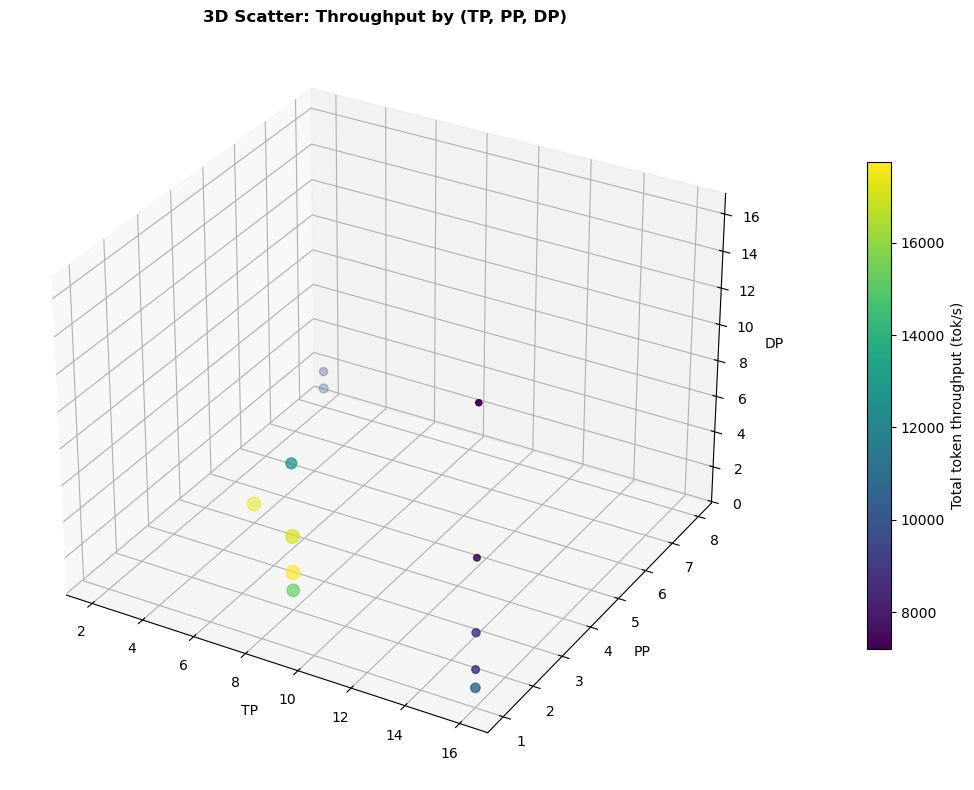

In [2]:
# Build 3D and 2.5D (heatmap) visualizations to make comparison easier.
# Charts use matplotlib only, one chart per figure, and do not specify any specific colors.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
# from caas_jupyter_tools import display_dataframe_to_user

# -----------------------------
# Re-create the dataset from your message
# -----------------------------
rows = [
    (2, 8, 1, 10121.05, ""),
    (16, 1, 1, 10567.17, ""),
    (2, 8, 2, 9039.90, ""),
    (16, 1, 2, 8566.00, ""),
    (4, 4, 1, 17324.45, ""),
    (16, 1, 4, 8959.44, ""),
    (4, 4, 2, None, "CUDA OOM"),
    (16, 1, 8, 7557.84, ""),
    (4, 4, 4, None, "CUDA OOM"),
    (16, 1, 16, 7202.73, ""),
    (8, 2, 1, 15159.387655088216, ""),
    (8, 2, 2, 17714.98, ""),
    (8, 2, 2, 17805.00, "repeat"),
    (8, 2, 4, 17111.97, ""),
    (8, 2, 8, 12679.88, ""),
]
df = pd.DataFrame(rows, columns=["TP", "PP", "DP", "Total tok/s", "Note"])

# Aggregate repeats
agg = (
    df.dropna(subset=["Total tok/s"])
      .groupby(["TP", "PP", "DP"], as_index=False)
      .agg(**{
          "tokps_mean": ("Total tok/s", "mean"),
          "tokps_best": ("Total tok/s", "max"),
          "n_runs": ("Total tok/s", "count"),
      })
)
# display_dataframe_to_user("Aggregated throughput (TP, PP, DP)", agg)

# -----------------------------
# 3D Scatter: Axes = TP, PP, DP | Z = throughput via color & size
# -----------------------------
fig1 = plt.figure(figsize=(11, 8))
ax1 = fig1.add_subplot(111, projection='3d')

x = agg["TP"].values
y = agg["PP"].values
z = agg["DP"].values
val = agg["tokps_mean"].values

# Normalize size for visibility
sizes = 20 + 80 * (val - val.min()) / (val.max() - val.min())

sc = ax1.scatter(x, y, z, s=sizes, c=val)  # default colormap

ax1.set_xlabel("TP")
ax1.set_ylabel("PP")
ax1.set_zlabel("DP")
ax1.set_title("3D Scatter: Throughput by (TP, PP, DP)", fontweight="bold")

# Colorbar with default mapping
cb = fig1.colorbar(sc, ax=ax1, shrink=0.65, pad=0.1)
cb.set_label("Total token throughput (tok/s)")

plt.tight_layout()
path1_png = "/mnt/data/3d_scatter_tp_pp_dp_tokps.png"
path1_pdf = "/mnt/data/3d_scatter_tp_pp_dp_tokps.pdf"
plt.savefig(path1_png, dpi=220, bbox_inches="tight")
plt.savefig(path1_pdf, bbox_inches="tight")

# -----------------------------
# 3D Bars: X=TP, Y=PP, Z height = throughput at a fixed DP slice (choose the best DP per TP/PP)
# -----------------------------
best_per_tp_pp = agg.sort_values(["TP", "PP", "tokps_best"], ascending=[True, True, False]) \
                    .groupby(["TP", "PP"], as_index=False).first()

fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

_x = best_per_tp_pp["TP"].values.astype(float)
_y = best_per_tp_pp["PP"].values.astype(float)
_z = np.zeros_like(_x)
dx = np.ones_like(_x) * 0.6
dy = np.ones_like(_y) * 0.6
dz = best_per_tp_pp["tokps_best"].values

ax2.bar3d(_x, _y, _z, dx, dy, dz)  # default color
ax2.set_xlabel("TP")
ax2.set_ylabel("PP")
ax2.set_zlabel("Throughput (tok/s)")
ax2.set_title("3D Bars: Best throughput per (TP, PP) (best DP chosen)", fontweight="bold")

plt.tight_layout()
path2_png = "/mnt/data/3d_bar_tp_pp_best_tokps.png"
path2_pdf = "/mnt/data/3d_bar_tp_pp_best_tokps.pdf"
plt.savefig(path2_png, dpi=220, bbox_inches="tight")
plt.savefig(path2_pdf, bbox_inches="tight")

# -----------------------------
# 2.5D Heatmaps: one figure per DP slice (grid TP x PP)
# -----------------------------
dps = sorted(agg["DP"].unique())
all_tp = sorted(agg["TP"].unique())
all_pp = sorted(agg["PP"].unique())

heatmap_paths = []
for dp in dps:
    sub = agg[agg["DP"] == dp]
    grid = np.full((len(all_tp), len(all_pp)), np.nan)
    for _, r in sub.iterrows():
        i = all_tp.index(int(r["TP"]))
        j = all_pp.index(int(r["PP"]))
        grid[i, j] = r["tokps_mean"]
    fig = plt.figure(figsize=(8.5, 7))
    ax = plt.gca()
    im = ax.imshow(grid, aspect="auto")  # default colormap
    
    # Axis ticks
    ax.set_xticks(np.arange(len(all_pp)))
    ax.set_xticklabels([str(p) for p in all_pp])
    ax.set_yticks(np.arange(len(all_tp)))
    ax.set_yticklabels([str(t) for t in all_tp])
    ax.set_xlabel("PP")
    ax.set_ylabel("TP")
    ax.set_title(f"Heatmap: Throughput (tok/s) at DP={dp}", fontweight="bold")
    
    # Annotate numbers where present
    for i in range(len(all_tp)):
        for j in range(len(all_pp)):
            if not np.isnan(grid[i, j]):
                ax.text(j, i, f"{grid[i, j]:.0f}",
                        ha="center", va="center", fontsize=10)
            else:
                ax.text(j, i, "—", ha="center", va="center", fontsize=10)
    
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="Total token throughput (tok/s)")
    plt.tight_layout()
    p_png = f"/mnt/data/heatmap_dp{int(dp)}_tp_by_pp.png"
    p_pdf = f"/mnt/data/heatmap_dp{int(dp)}_tp_by_pp.pdf"
    plt.savefig(p_png, dpi=220, bbox_inches="tight")
    plt.savefig(p_pdf, bbox_inches="tight")
    heatmap_paths.append((p_png, p_pdf))

# -----------------------------
# 3D Surface (optional interpolation): build a surface for a fixed DP (choose DP with most points)
# -----------------------------
dp_counts = agg["DP"].value_counts().sort_values(ascending=False)
dp_surface = int(dp_counts.index[0])  # pick DP with the most data points
surf_sub = agg[agg["DP"] == dp_surface]

# Prepare a coarse TP-PP grid; fill with NaNs where missing (keeps honest gaps)
tp_vals = sorted(surf_sub["TP"].unique())
pp_vals = sorted(surf_sub["PP"].unique())
Z = np.full((len(tp_vals), len(pp_vals)), np.nan)
for _, r in surf_sub.iterrows():
    i = tp_vals.index(int(r["TP"]))
    j = pp_vals.index(int(r["PP"]))
    Z[i, j] = r["tokps_mean"]

X, Y = np.meshgrid(pp_vals, tp_vals)  # X: PP, Y: TP

fig4 = plt.figure(figsize=(11, 8))
ax4 = fig4.add_subplot(111, projection='3d')

# We only plot finite cells to avoid misleading interpolation
# Represent as a "wireframe" of valid points
valid_mask = np.isfinite(Z)
xs = X[valid_mask]
ys = Y[valid_mask]
zs = Z[valid_mask]

ax4.plot_trisurf(xs, ys, zs)  # default colormap
ax4.set_xlabel("PP")
ax4.set_ylabel("TP")
ax4.set_zlabel("Throughput (tok/s)")
ax4.set_title(f"3D Surface (no interp over gaps): DP={dp_surface}", fontweight="bold")

plt.tight_layout()
path4_png = "/mnt/data/3d_surface_tp_pp_at_bestdp.png"
path4_pdf = "/mnt/data/3d_surface_tp_pp_at_bestdp.pdf"
plt.savefig(path4_png, dpi=220, bbox_inches="tight")
plt.savefig(path4_pdf, bbox_inches="tight")

(path1_png, path1_pdf, path2_png, path2_pdf, heatmap_paths, path4_png, path4_pdf)


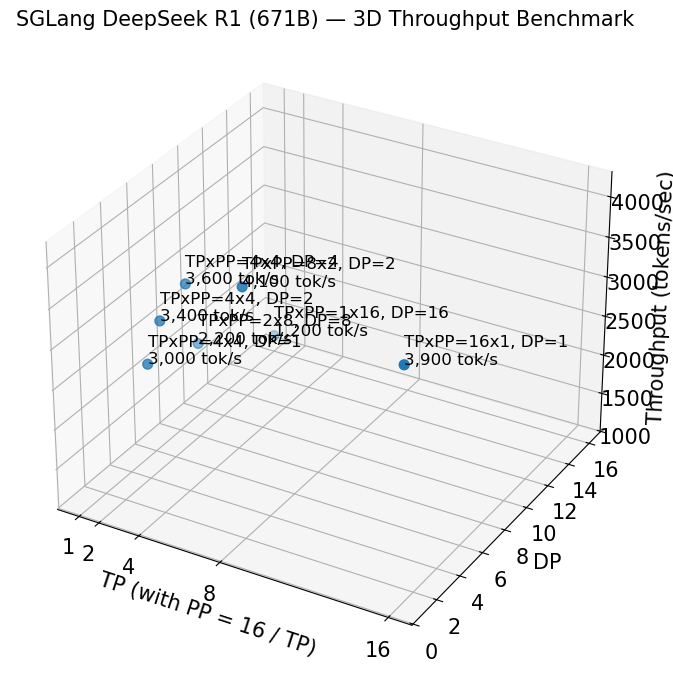

In [1]:
# 3D Benchmark Plot for SGLang DeepSeek R1 (2 nodes, 16x H200 total)
# - X axis: TP (with PP = 16 / TP)
# - Y axis: DP
# - Z axis: Throughput (tokens/sec)
#
# How to use:
# 1) Replace the `experiments` list below with your real measurements.
#    For each run, fill in TP, DP, and throughput (tok/s). PP will be inferred as 16 // TP.
# 2) Run the cell to regenerate the figure.
#
# Notes:
# - The plot uses only matplotlib (no seaborn).
# - All labels are in English; font sizes set to 15 as requested.
# - The script saves both PNG and PDF to /mnt/data for download.

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

plt.rcParams["font.size"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

# ------------------------------------------------------------------
# TODO: Replace with your actual results
# Each dict = one experiment: {"TP": int, "DP": int, "throughput": float}
# PP is inferred as 16 // TP (assuming world_size per node sums to PP*TP and total PP*TP=16)
# ------------------------------------------------------------------
experiments = [
    {"TP": 1,  "DP": 16, "throughput": 1200.0},
    {"TP": 2,  "DP": 8,  "throughput": 2200.0},
    {"TP": 4,  "DP": 4,  "throughput": 3600.0},
    {"TP": 8,  "DP": 2,  "throughput": 4100.0},
    {"TP": 16, "DP": 1,  "throughput": 3900.0},
    # Add more points if you tested multiple DP values for the same TP, e.g.:
    {"TP": 4,  "DP": 2,  "throughput": 3400.0},
    {"TP": 4,  "DP": 1,  "throughput": 3000.0},
]

# Build DataFrame and validate
df = pd.DataFrame(experiments)
if not {"TP", "DP", "throughput"}.issubset(df.columns):
    raise ValueError("Each experiment must have TP, DP, and throughput fields.")

# Infer PP and validate that 16 is divisible by TP (as per your description PP = 16 / TP)
def infer_pp(tp):
    if (16 % tp) != 0:
        raise ValueError(f"TP={tp} does not divide 16, cannot set PP=16/TP.")
    return 16 // tp

df["PP"] = df["TP"].apply(infer_pp)

# Prepare data for plotting
X = df["TP"].to_numpy(dtype=float)
Y = df["DP"].to_numpy(dtype=float)
Z = df["throughput"].to_numpy(dtype=float)

# Create a single 3D scatter plot (no specific colors set)
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(X, Y, Z, s=50)  # default color/marker

# Annotate each point with a brief label
# Example annotation: "TPxPP=4x4, DP=2\n1,234 tok/s"
for tp, dp, th in zip(X, Y, Z):
    pp = infer_pp(int(tp))
    label = f"TPxPP={int(tp)}x{pp}, DP={int(dp)}\n{th:,.0f} tok/s"
    ax.text(tp, dp, th, label, fontsize=12, zdir=None)

# Axis labels and title (English, size 15 via rcParams above)
ax.set_title("SGLang DeepSeek R1 (671B) — 3D Throughput Benchmark")
ax.set_xlabel("TP (with PP = 16 / TP)")
ax.set_ylabel("DP")
ax.set_zlabel("Throughput (tokens/sec)")

# Ticks: ensure TP ticks are integers that divide 16
tp_ticks = sorted({int(t) for t in X})
ax.set_xticks(tp_ticks)

# Optional: show grid
ax.grid(True)

# Tight layout and save
plt.tight_layout()
# png_path = "/mnt/data/sglang_3d_throughput.png"
# pdf_path = "/mnt/data/sglang_3d_throughput.pdf"
# plt.savefig(png_path, bbox_inches="tight", dpi=220)
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()
# png_path, pdf_path


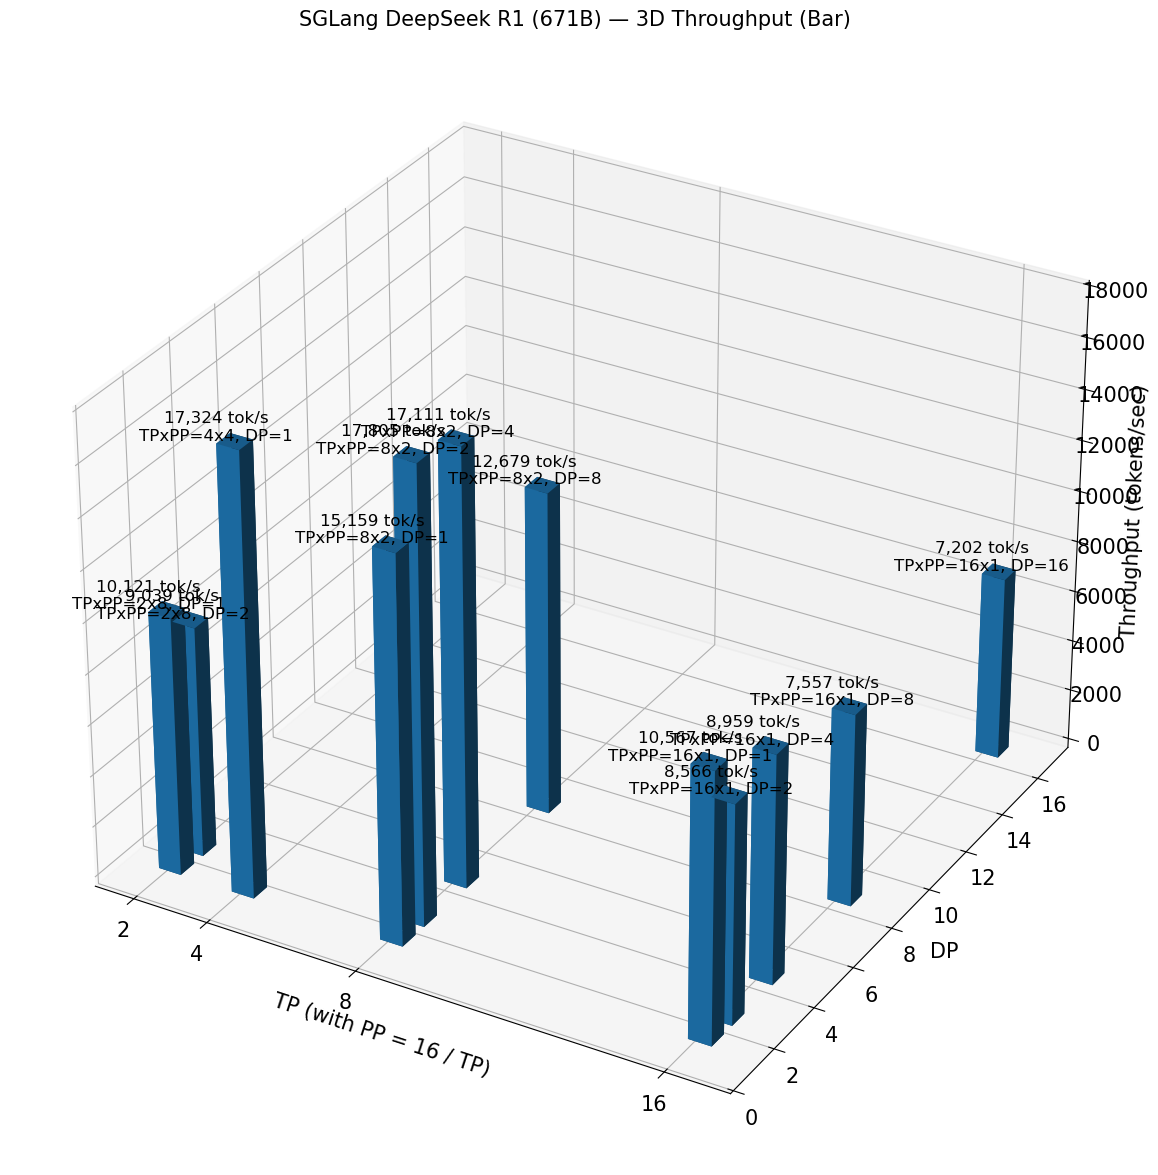

In [6]:
# 3D BAR Benchmark Plot for SGLang DeepSeek R1 (2 nodes, 16x H200 total)
# - X axis: TP (with PP = 16 / TP)
# - Y axis: DP
# - Z axis: Throughput (tokens/sec)
#
# How to use:
# 1) Replace the `experiments` list below with your real measurements.
#    For each run, fill in TP, DP, and throughput (tok/s). PP will be inferred as 16 // TP.
# 2) Run the cell to regenerate the figure.
#
# Notes:
# - Uses only matplotlib (no seaborn), single figure.
# - All labels/annotations are in English; font sizes set to 15.
# - Saves both PNG and PDF to /mnt/data for download.

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

plt.rcParams["font.size"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

# ------------------------------------------------------------------
# TODO: Replace with your actual results
# Each dict = one experiment: {"TP": int, "DP": int, "throughput": float}
# PP is inferred as 16 // TP (assuming PP*TP = 16)
# ------------------------------------------------------------------
# experiments = [
#     {"TP": 1,  "DP": 16, "throughput": 1200.0},
#     {"TP": 2,  "DP": 8,  "throughput": 2200.0},
#     {"TP": 4,  "DP": 4,  "throughput": 3600.0},
#     {"TP": 8,  "DP": 2,  "throughput": 4100.0},
#     {"TP": 16, "DP": 1,  "throughput": 3900.0},
#     {"TP": 4,  "DP": 2,  "throughput": 3400.0},
#     {"TP": 4,  "DP": 1,  "throughput": 3000.0},
# ]

experiments = [
    {"TP": 2,  "DP": 1,  "input": 6246.87, "output": 3874.18, "total": 10121.05},
    {"TP": 2,  "DP": 2,  "input": 5579.57, "output": 3460.34, "total": 9039.90},
    {"TP": 4,  "DP": 1,  "input": 10692.91, "output": 6631.53, "total": 17324.45},
    # TP=4, DP=2/4 OOM
    {"TP": 8,  "DP": 1,  "input": 9356.61,  "output": 5802.78, "total": 15159.39},
    {"TP": 8,  "DP": 2,  "input": 10989.52, "output": 6815.48, "total": 17805.00},
    {"TP": 8,  "DP": 4,  "input": 10561.77, "output": 6550.20, "total": 17111.97},
    {"TP": 8,  "DP": 8,  "input": 7826.21,  "output": 4853.66, "total": 12679.88},
    {"TP": 16, "DP": 1,  "input": 6522.22,  "output": 4044.95, "total": 10567.17},
    {"TP": 16, "DP": 2,  "input": 5287.06,  "output": 3278.93, "total": 8566.00},
    {"TP": 16, "DP": 4,  "input": 5529.90,  "output": 3429.54, "total": 8959.44},
    {"TP": 16, "DP": 8,  "input": 4664.81,  "output": 2893.02, "total": 7557.84},
    {"TP": 16, "DP": 16, "input": 4445.64,  "output": 2757.10, "total": 7202.73},
]


df = pd.DataFrame(experiments)
required = {"TP", "DP", "total"}
if not required.issubset(df.columns):
    raise ValueError("Each experiment must have TP, DP, and total fields.")

def infer_pp(tp):
    if (16 % tp) != 0:
        raise ValueError(f"TP={tp} does not divide 16, cannot set PP=16/TP.")
    return 16 // tp

df["PP"] = df["TP"].apply(infer_pp)

# Sort for consistent placement
df = df.sort_values(["TP", "DP"]).reset_index(drop=True)

# Base coordinates and bar sizes
xs = df["TP"].to_numpy(dtype=float)
ys = df["DP"].to_numpy(dtype=float)
zs = np.zeros_like(xs)  # bases at z=0
dx = np.full_like(xs, 0.6, dtype=float)
dy = np.full_like(xs, 0.6, dtype=float)
dz = df["total"].to_numpy(dtype=float)

# Create 3D bar plot
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(xs, ys, zs, dx, dy, dz, shade=True)

# Annotate: "TPxPP=..x.., DP=..  X,XXX tok/s"
for x, y, h in zip(xs, ys, dz):
    pp = infer_pp(int(x))
    ax.text(x, y, h, f"{int(h):,} tok/s\nTPxPP={int(x)}x{pp}, DP={int(y)}",
            fontsize=12, zdir=None, ha="center", va="bottom")

# Axis labels and title
ax.set_title("SGLang DeepSeek R1 (671B) — 3D Throughput (Bar)")
ax.set_xlabel("TP (with PP = 16 / TP)")
ax.set_ylabel("DP")
ax.set_zlabel("Throughput (tokens/sec)")

# X ticks as integers that divide 16
xticks = sorted({int(x) for x in xs})
ax.set_xticks(xticks)

# Optional grid
ax.grid(True)

# Save
plt.tight_layout()
# png_path = "/mnt/data/sglang_3d_bar_throughput.png"
# pdf_path = "/mnt/data/sglang_3d_bar_throughput.pdf"
# plt.savefig(png_path, bbox_inches="tight", dpi=220)
# plt.savefig(pdf_path, bbox_inches="tight")
# png_path, pdf_path


('/mnt/data/sglang_3d_bar_throughput_real.png',
 '/mnt/data/sglang_3d_bar_throughput_real.pdf')

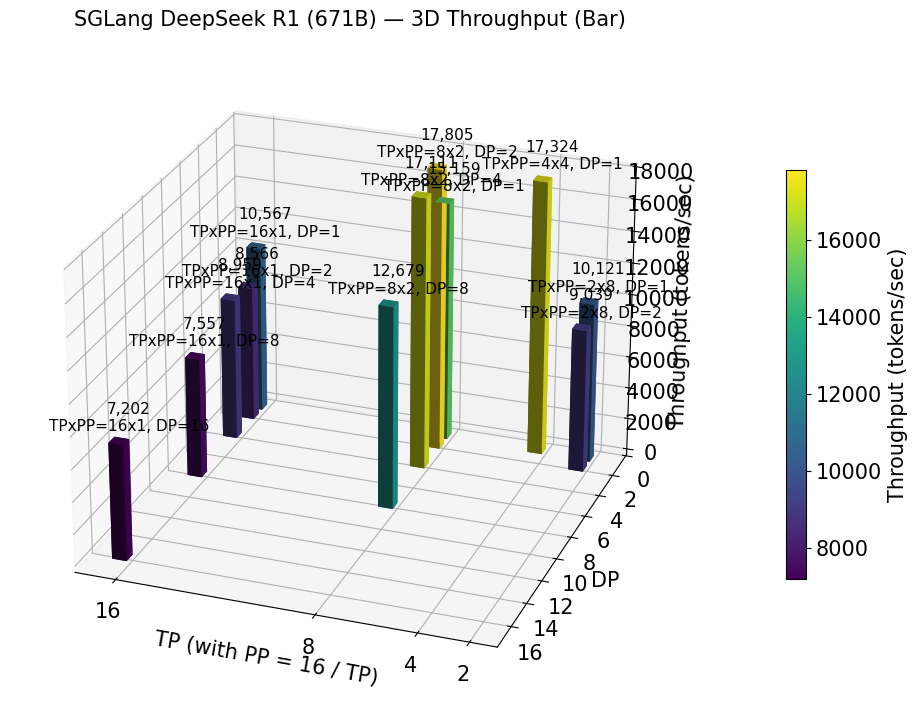

In [13]:
# 3D BAR Benchmark Plot for SGLang DeepSeek R1 (2 nodes, 16x H200 total)
# Using user's real data for TP, DP, and throughput ("total" field).
#
# - X axis: TP (with PP = 16 / TP)
# - Y axis: DP
# - Z axis: Total throughput (tokens/sec)
#
# All labels in English, font size 15.

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib import cm

plt.rcParams["font.size"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

# ------------------------------------------------------------------
# User-provided experiment data
# ------------------------------------------------------------------
experiments = [
    {"TP": 2,  "DP": 1,  "input": 6246.87, "output": 3874.18, "total": 10121.05},
    {"TP": 2,  "DP": 2,  "input": 5579.57, "output": 3460.34, "total": 9039.90},
    {"TP": 4,  "DP": 1,  "input": 10692.91, "output": 6631.53, "total": 17324.45},
    {"TP": 8,  "DP": 1,  "input": 9356.61,  "output": 5802.78, "total": 15159.39},
    {"TP": 8,  "DP": 2,  "input": 10989.52, "output": 6815.48, "total": 17805.00},
    {"TP": 8,  "DP": 4,  "input": 10561.77, "output": 6550.20, "total": 17111.97},
    {"TP": 8,  "DP": 8,  "input": 7826.21,  "output": 4853.66, "total": 12679.88},
    {"TP": 16, "DP": 1,  "input": 6522.22,  "output": 4044.95, "total": 10567.17},
    {"TP": 16, "DP": 2,  "input": 5287.06,  "output": 3278.93, "total": 8566.00},
    {"TP": 16, "DP": 4,  "input": 5529.90,  "output": 3429.54, "total": 8959.44},
    {"TP": 16, "DP": 8,  "input": 4664.81,  "output": 2893.02, "total": 7557.84},
    {"TP": 16, "DP": 16, "input": 4445.64,  "output": 2757.10, "total": 7202.73},
]

df = pd.DataFrame(experiments)

# Infer PP = 16 / TP
def infer_pp(tp):
    if (16 % tp) != 0:
        raise ValueError(f"TP={tp} does not divide 16.")
    return 16 // tp

df["PP"] = df["TP"].apply(infer_pp)

# Sort for visual consistency
df = df.sort_values(["TP", "DP"]).reset_index(drop=True)

# Coordinates for bars
xs = df["TP"].to_numpy(dtype=float)
ys = df["DP"].to_numpy(dtype=float)
zs = np.zeros_like(xs)
dx = np.full_like(xs, 0.6, dtype=float)
dy = np.full_like(xs, 0.6, dtype=float)
dz = df["total"].to_numpy(dtype=float)

# Normalize colors by throughput
norm = plt.Normalize(dz.min(), dz.max())
colors = cm.viridis(norm(dz))

# Create 3D bar plot
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(xs, ys, zs, dx, dy, dz, shade=True, color=colors)

# Annotate bars
for x, y, h in zip(xs, ys, dz):
    pp = infer_pp(int(x))
    ax.text(x, y, h + 300, f"{int(h):,}\nTPxPP={int(x)}x{pp}, DP={int(y)}",
            fontsize=11, ha="center", va="bottom")

# Axis labels and title
ax.set_title("SGLang DeepSeek R1 (671B) — 3D Throughput (Bar)")
ax.set_xlabel("TP (with PP = 16 / TP)")
ax.set_ylabel("DP")
ax.set_zlabel("Throughput (tokens/sec)")

# 改变视角角度
ax.view_init(elev=25, azim=110)
# Colorbar
mappable = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.1, label="Throughput (tokens/sec)")

# X ticks as integers that divide 16
ax.set_xticks(sorted({int(x) for x in xs}))

# Grid and save
ax.grid(True)
plt.tight_layout()
# png_path = "/mnt/data/sglang_3d_bar_throughput_real.png"
# pdf_path = "/mnt/data/sglang_3d_bar_throughput_real.pdf"
# plt.savefig(png_path, bbox_inches="tight", dpi=220)
# plt.savefig(pdf_path, bbox_inches="tight")
png_path, pdf_path
